In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math


In [2]:
%matplotlib inline

In [3]:
Degree = 3 # degree
Height = 3 # Height of the tree

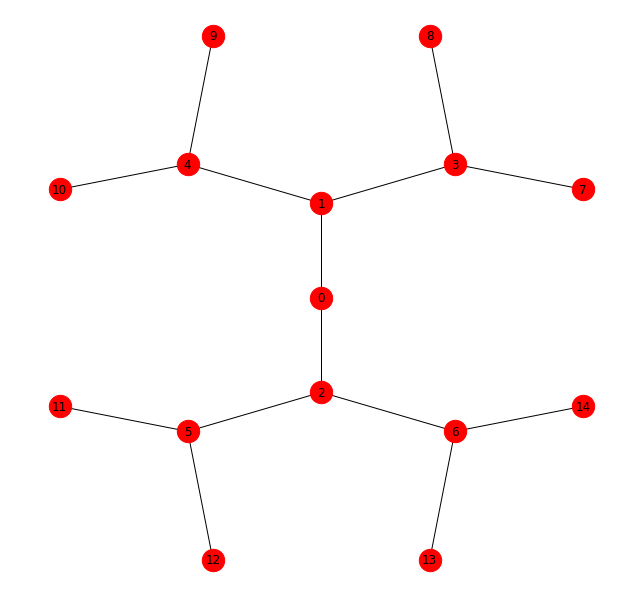

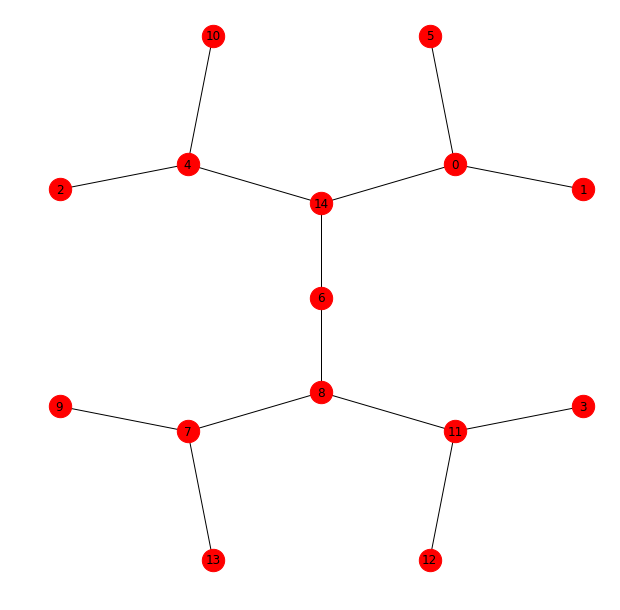

In [49]:
N, J_interaction = graph_gen.tree_interaction(Degree,Height)
N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree,Height, rand=True)

In [51]:
j_start = 1
h_start = 1
betas = np.arange(1e-4,1,0.1)

j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)

#J_rand = graph_gen.set_J(J_interaction_rand, j)

h = h_start
H = np.full((N,), h)

tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H, J_rand, J_interaction_rand)

fe_ex = []
ener_ex = []
m_ex = []

for beta in betas:
    tree.exact(beta)
    fe_ex.append(tree.free_energy)
    ener_ex.append(tree.E_mean)
    m_ex.append(tree.M_mean)


Enumerating...
32000 / 32768(97.66%), E = 3.0, Z = 3.2e+04, F = -1.04e+05
Energy: -0.000193 
M: 0.0001 
S: 0.693
Free_energy: -6931.472 (-6931.472)
Enumerating...
32000 / 32768(97.66%), E = 3.0, Z = 3.6e+04, F = -1.05e+02
Energy: -0.226 
M: 0.121 
S: 0.681
Free_energy: -7.032 (-7.032)
Enumerating...
32000 / 32768(97.66%), E = 3.0, Z = 5.58e+04, F = -54.6
Energy: -0.53 
M: 0.287 
S: 0.635
Free_energy: -3.703 (-3.703)
Enumerating...
32000 / 32768(97.66%), E = 3.0, Z = 1.24e+05, F = -39.1
Energy: -0.896 
M: 0.483 
S: 0.543
Free_energy: -2.706 (-2.706)
Enumerating...
32000 / 32768(97.66%), E = 3.0, Z = 3.97e+05, F = -32.2
Energy: -1.25 
M: 0.663 
S: 0.421
Free_energy: -2.299 (-2.299)
Enumerating...
32000 / 32768(97.66%), E = 3.0, Z = 1.72e+06, F = -28.7
Energy: -1.51 
M: 0.792 
S: 0.305
Free_energy: -2.116 (-2.116)
Enumerating...
32000 / 32768(97.66%), E = 3.0, Z = 9.39e+06, F = -26.8
Energy: -1.67 
M: 0.873 
S: 0.215
Free_energy: -2.029 (-2.029)
Enumerating...
32000 / 32768(97.66%), E = 3

In [52]:
import imp
import bp_nn
imp.reload(bp_nn)

fe_nn = []
ener_nn = []
m_nn = []
fe_nn_rand = []
ener_nn_rand = []
m_nn_rand = []


net = bp_nn.bp_nn(N, tree, True)
net_rand = bp_nn.bp_nn(N, tree_rand, True)

for beta in betas:
    
    net.train(beta = beta)
    net.compute_stat(beta, batch_size = 100000)
    fe_nn.append(net.F_mean)
    ener_nn.append(net.E_mean)
    m_nn.append(net.M_mean)

    net_rand.train(beta = beta)
    net_rand.compute_stat(beta, batch_size = 100000)
    fe_nn_rand.append(net.F_mean)
    ener_nn_rand.append(net.E_mean)
    m_nn_rand.append(net.M_mean)


 0.00 10000 fe: -6931.472 +- 0.000 M: -0.0076
 0.00 10000 fe: -6931.472 +- 0.001 M: 0.000933
 0.10 809 fe: -7.032 +- 0.000 M: 0.111
 0.10 10000 fe: -7.032 +- 0.014 M: 0.122
 0.20 1323 fe: -3.703 +- 0.000 M: 0.297
 0.20 10000 fe: -3.702 +- 0.023 M: 0.289
 0.30 2155 fe: -2.706 +- 0.000 M: 0.498
 0.30 10000 fe: -2.705 +- 0.026 M: 0.489
 0.40 3204 fe: -2.299 +- 0.000 M: 0.669
 0.40 10000 fe: -2.298 +- 0.018 M: 0.654
 0.50 4395 fe: -2.116 +- 0.000 M: 0.806
 0.50 10000 fe: -2.116 +- 0.009 M: 0.803
 0.60 5916 fe: -2.029 +- 0.000 M: 0.878
 0.60 10000 fe: -2.029 +- 0.004 M: 0.875
 0.70 5729 fe: -1.986 +- 0.000 M: 0.928
 0.70 10000 fe: -1.986 +- 0.003 M: 0.92
 0.80 1707 fe: -1.963 +- 0.000 M: 0.954
 0.80 4635 fe: -1.963 +- 0.000 M: 0.952
 0.90 1559 fe: -1.951 +- 0.000 M: 0.969
 0.90 2164 fe: -1.951 +- 0.000 M: 0.967
free_energy: -1.951,  std_fe: 0.001, mag_mean: 0.968, entropy: 0.074 energy: -1.868

In [53]:
imp.reload(bp_solver)
import bp_solver

fe_bp = []
ener_bp = []
m_bp = []
BP_tree = bp_solver.BP_solver(tree) 

for beta in betas:
    
    BP_tree.converge(beta, error = 1e-6)
    fe_bp.append(BP_tree.F)
    ener_bp.append(BP_tree.E_mean)
    m_bp.append(BP_tree.M_mean)


 iter:3,  err: 0.000 free_energy -6931.47
 bp 
 fe: -6931.472, ener: -0.000, M: 0.000
 iter:5,  err: 0.000 free_energy -7.03
 bp 
 fe: -7.032, ener: -0.226, M: 0.121
 iter:5,  err: 0.000 free_energy -3.70
 bp 
 fe: -3.703, ener: -0.530, M: 0.287
 iter:5,  err: 0.000 free_energy -2.71
 bp 
 fe: -2.706, ener: -0.896, M: 0.483
 iter:5,  err: 0.000 free_energy -2.30
 bp 
 fe: -2.299, ener: -1.247, M: 0.663
 iter:5,  err: 0.000 free_energy -2.12
 bp 
 fe: -2.116, ener: -1.506, M: 0.792
 iter:5,  err: 0.000 free_energy -2.03
 bp 
 fe: -2.029, ener: -1.671, M: 0.873
 iter:5,  err: 0.000 free_energy -1.99
 bp 
 fe: -1.986, ener: -1.771, M: 0.921
 iter:5,  err: 0.000 free_energy -1.96
 bp 
 fe: -1.963, ener: -1.831, M: 0.950
 iter:5,  err: 0.000 free_energy -1.95
 bp 
 fe: -1.951, ener: -1.868, M: 0.968


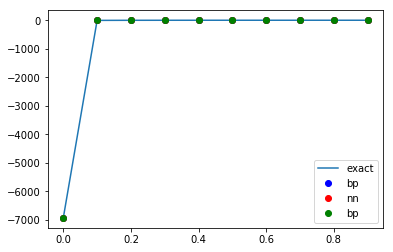

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
plt.plot(x, fe_ex, label = "exact")
plt.plot(x,fe_bp, "bo", label="bp")
plt.plot(x,fe_nn, "ro", label="nn")
plt.plot(x,fe_nn_rand, "go", label="bp")
plt.legend()
plt.show()

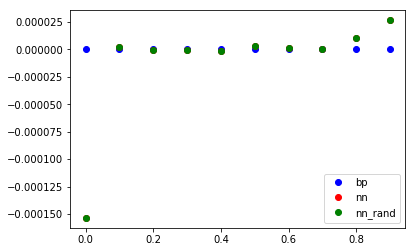

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
fe_ex = np.array(fe_ex)
fe_bp = np.array(fe_bp)
fe_nn = np.array(fe_nn)
fe_nn_rand = np.array(fe_nn_rand)

plt.plot(x, fe_bp - fe_ex, "bo", label="bp")
plt.plot(x, fe_nn - fe_ex, "ro", label="nn")
plt.plot(x, fe_nn_rand - fe_ex, "go", label="nn_rand")

plt.legend()
plt.show()

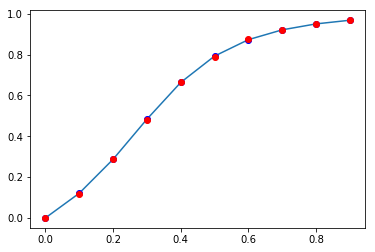

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
plt.plot(x, m_ex, label = "exact")
plt.plot(x,m_bp, "bo", label="bp")
plt.plot(x,m_nn, "ro", label="nn")
plt.legend
plt.show()

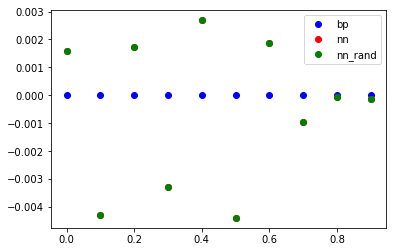

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas

m_ex = np.array(m_ex)
m_bp = np.array(m_bp)
m_nn = np.array(m_nn)
m_nn_rand = np.array(m_nn_rand)

plt.plot(x, m_bp - m_ex, "bo", label="bp")
plt.plot(x, m_nn - m_ex, "ro", label="nn")
plt.plot(x, m_nn_rand - m_ex, "go",label = "nn_rand")

plt.legend()
plt.show()